In [ ]:
# Versão 1.1 do código para gerar diagramas de fase das LC
# Otimizado utilizando método Lomb-Scargle para calcular o periodo ideal da fase

# By Josafary Campelo
# 23.10.2023

In [1]:
import matplotlib.pyplot as plt
import lightkurve as lk
import numpy as np

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
tic = 'TIC 417620454'

# Searching available sectors
data = lk.search_lightcurve(tic, author='SPOC', exptime=120)
data

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 19,2019,SPOC,120,417620454,0.0
1,TESS Sector 20,2019,SPOC,120,417620454,0.0
2,TESS Sector 25,2020,SPOC,120,417620454,0.0
3,TESS Sector 26,2020,SPOC,120,417620454,0.0
4,TESS Sector 40,2021,SPOC,120,417620454,0.0
5,TESS Sector 47,2021,SPOC,120,417620454,0.0
6,TESS Sector 52,2022,SPOC,120,417620454,0.0
7,TESS Sector 53,2022,SPOC,120,417620454,0.0
8,TESS Sector 59,2022,SPOC,120,417620454,0.0


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

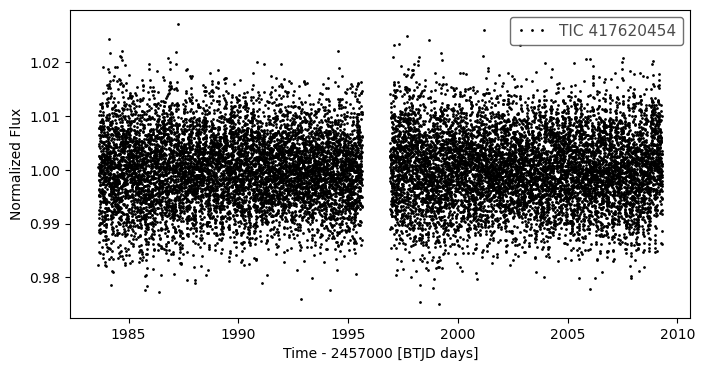

In [3]:
# Downloading one sector by time
index = 2
lc_sector = data[index].download().normalize().remove_outliers()
sector = data.table['mission'][index][12:]

fig, ax = plt.subplots(figsize=(8,4))

lc_sector.plot(ax=ax, linewidth=0, marker='o', color='k', markersize=1)

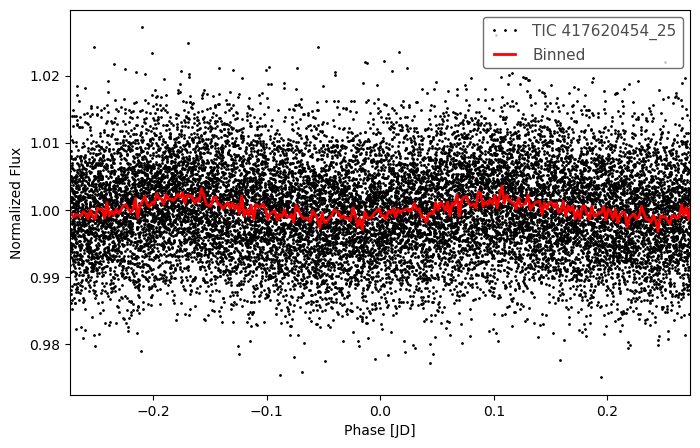

In [8]:
time_1 = min(lc_sector.time.value)
periodogram = lc_sector.to_periodogram()
period = periodogram.period_at_max_power.value
double_period = period*2
#double_period = 0.54721


lc_phased = lc_sector.fold(period=double_period, epoch_time=time_1)
bin_time = 3/24/60
lc_phased_binned = lc_phased.bin(bin_time)



fig, ax = plt.subplots(figsize=(8,5))
lc_phased.plot(ax=ax, linewidth=0, marker='o', color='k', markersize=1, label=tic+'_'+sector)
lc_phased_binned.plot(ax=ax, linewidth=2, color='r', label='Binned')
x_min = min(lc_phased.time.value)
x_max = max(lc_phased.time.value)
plt.xlim(x_min, x_max)

plt.savefig('../../NAOS/Bstars/DR3data/MAPS_Files/377_SAMPLE/phase_folded/'+tic.split(' ')[1]+'_'+sector+'.png', dpi=400)

In [5]:
#period = 0.270
#double_period = period*2
def plot_folded_color(period):
    lc_phased = lc_sector.fold(period=period, epoch_time=time_1)
    fig, ax = plt.subplots(figsize=(8,5))
    plt.scatter(lc_phased.time.value, lc_phased.flux.value, c=lc_phased.time_original.value, s=1, marker='o')
    
    plt.xlabel('Phase')
    plt.ylabel('Normalized flux')
    plt.show()
    

interact(plot_folded_color, period=widgets.FloatSlider(value=double_period, min=(double_period)-0.3, max=(double_period)+0.3, step=0.001, description='period', readout_format='.5'))
#interact(plot_folded_color, period=widgets.FloatSlider(value=period, min=(period)-0.3, max=(period)+0.3, step=0.001, description='period', readout_format='.5'))

interactive(children=(FloatSlider(value=0.5462100283178265, description='period', max=0.8462100283178264, min=…

<function __main__.plot_folded_color(period)>